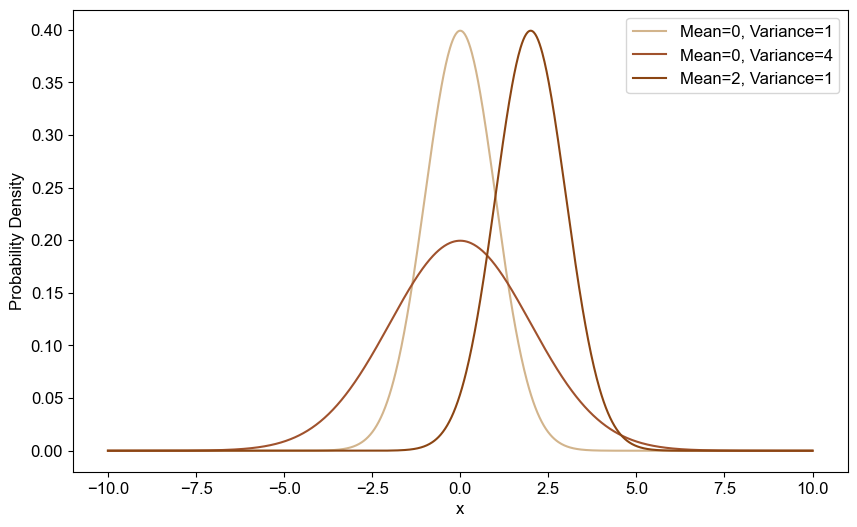

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(-10, 10, 1000)
mean = 0

# Normal distributions
y1 = (1 / (np.sqrt(2 * np.pi * 1**2))) * np.exp(-0.5 * ((x - mean) / 1)**2)  # mean=0, variance=1
y2 = (1 / (np.sqrt(2 * np.pi * 2**2))) * np.exp(-0.5 * ((x - mean) / 2)**2)  # mean=0, variance=4
y3 = (1 / (np.sqrt(2 * np.pi * 1**2))) * np.exp(-0.5 * ((x - 2) / 1)**2)      # mean=2, variance=1

# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Define colors
colors = ['#D2B48C', '#A0522D', '#8B4513']  # Lighter to darker shades of brown

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Mean=0, Variance=1', color=colors[0])
plt.plot(x, y2, label='Mean=0, Variance=4', color=colors[1])
plt.plot(x, y3, label='Mean=2, Variance=1', color=colors[2])

# Adding labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# Show plot
plt.show()

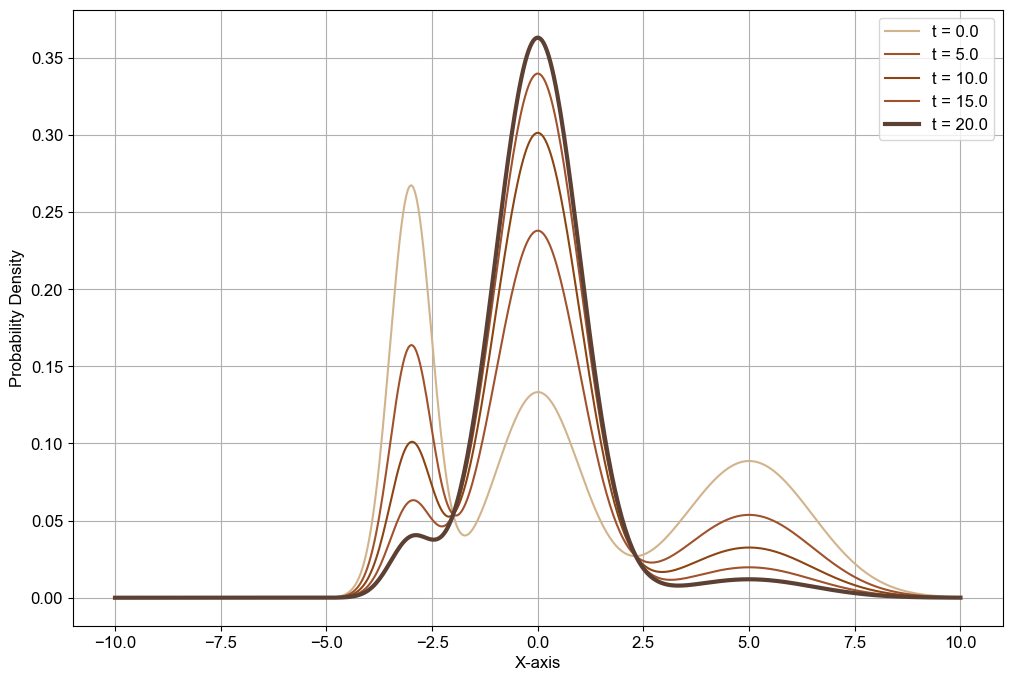

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for three normal distributions
means = [0, 5, -3]
std_devs = [1, 1.5, 0.5]
n = len(means)

# Converging weights function
def alpha_converging(t, i):
    return np.exp(-t/10) * (1/n) + (1 - np.exp(-t/10)) * (1 if i == 0 else 0)

# Generate data for visualization
t_values = np.linspace(0, 100, 500)  # Time values
x_values = np.linspace(-10, 10, 500)  # X-axis values

# Initialize lists to store the mixture distributions
mixture_distributions = []

# Calculate the mixture distribution at each time t
for t in t_values:
    mixture_pdf = np.zeros_like(x_values)
    for i in range(n):
        mixture_pdf += alpha_converging(t, i) * norm.pdf(x_values, means[i], std_devs[i])
    mixture_distributions.append(mixture_pdf)

# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Plot the mixture distributions at selected time points
plt.figure(figsize=(12, 8))
time_points = [0, 5, 10, 15, 20]  # Specific time points to plot

# Define colors
colors = ['#D2B48C', '#A0522D', '#8B4513', '#A0522D', '#5C4033']  # Lighter to darker shades of brown

for idx, t in enumerate(time_points):
    if t == 20:
        plt.plot(x_values, mixture_distributions[int(t * 25 / 5)], label=f't = {t:.1f}', linewidth=3, color='#5C4033')  # Dark brown
    else:
        plt.plot(x_values, mixture_distributions[int(t * 25 / 5)], label=f't = {t:.1f}', linewidth=1.5, color=colors[idx])

plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

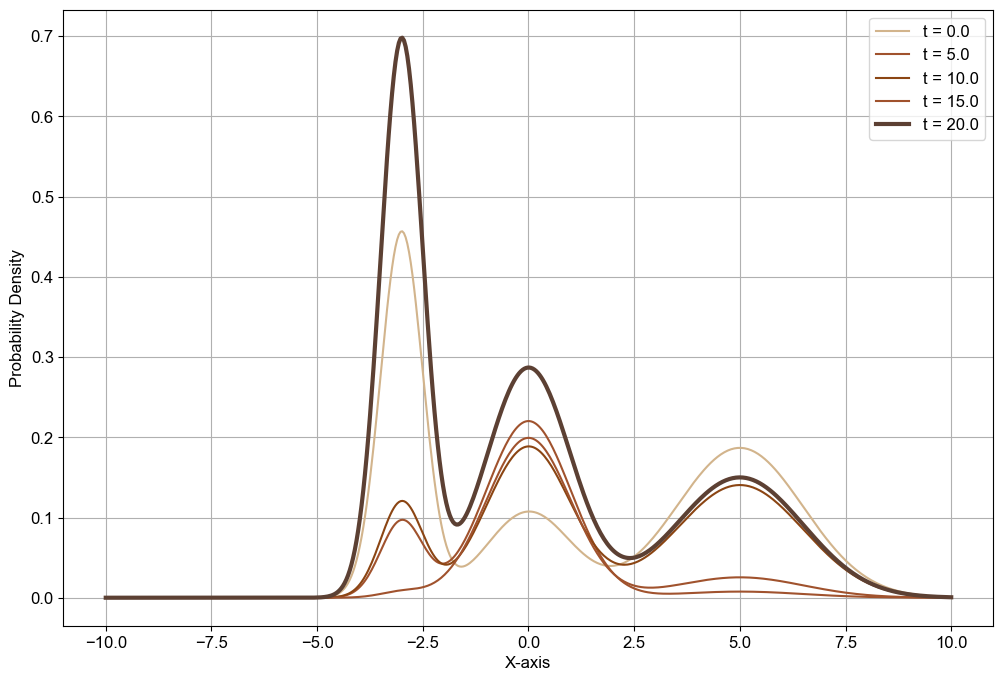

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for three normal distributions
means = [0, 5, -3]
std_devs = [1, 1.5, 0.5]
n = len(means)

# Random weights function
def alpha_random(t, i):
    np.random.seed(int(t * 10 + i))  # Seed for reproducibility
    return np.random.dirichlet(np.ones(n))[i]

# Generate data for visualization
t_values = np.linspace(0, 100, 500)  # Time values
x_values = np.linspace(-10, 10, 500)  # X-axis values

# Initialize lists to store the mixture distributions
mixture_distributions = []

# Calculate the mixture distribution at each time t
for t in t_values:
    mixture_pdf = np.zeros_like(x_values)
    for i in range(n):
        mixture_pdf += alpha_random(t, i) * norm.pdf(x_values, means[i], std_devs[i])
    mixture_distributions.append(mixture_pdf)

# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Plot the mixture distributions at selected time points
plt.figure(figsize=(12, 8))
time_points = [0, 5, 10, 15, 20]  # Specific time points to plot

# Define colors
colors = ['#D2B48C', '#A0522D', '#8B4513', '#A0522D', '#5C4033']  # Lighter to darker shades of brown

for idx, t in enumerate(time_points):
    if t == 20:
        plt.plot(x_values, mixture_distributions[int(t * 25 / 5)], label=f't = {t:.1f}', linewidth=3, color='#5C4033')  # Dark brown
    else:
        plt.plot(x_values, mixture_distributions[int(t * 25 / 5)], label=f't = {t:.1f}', linewidth=1.5, color=colors[idx])

plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

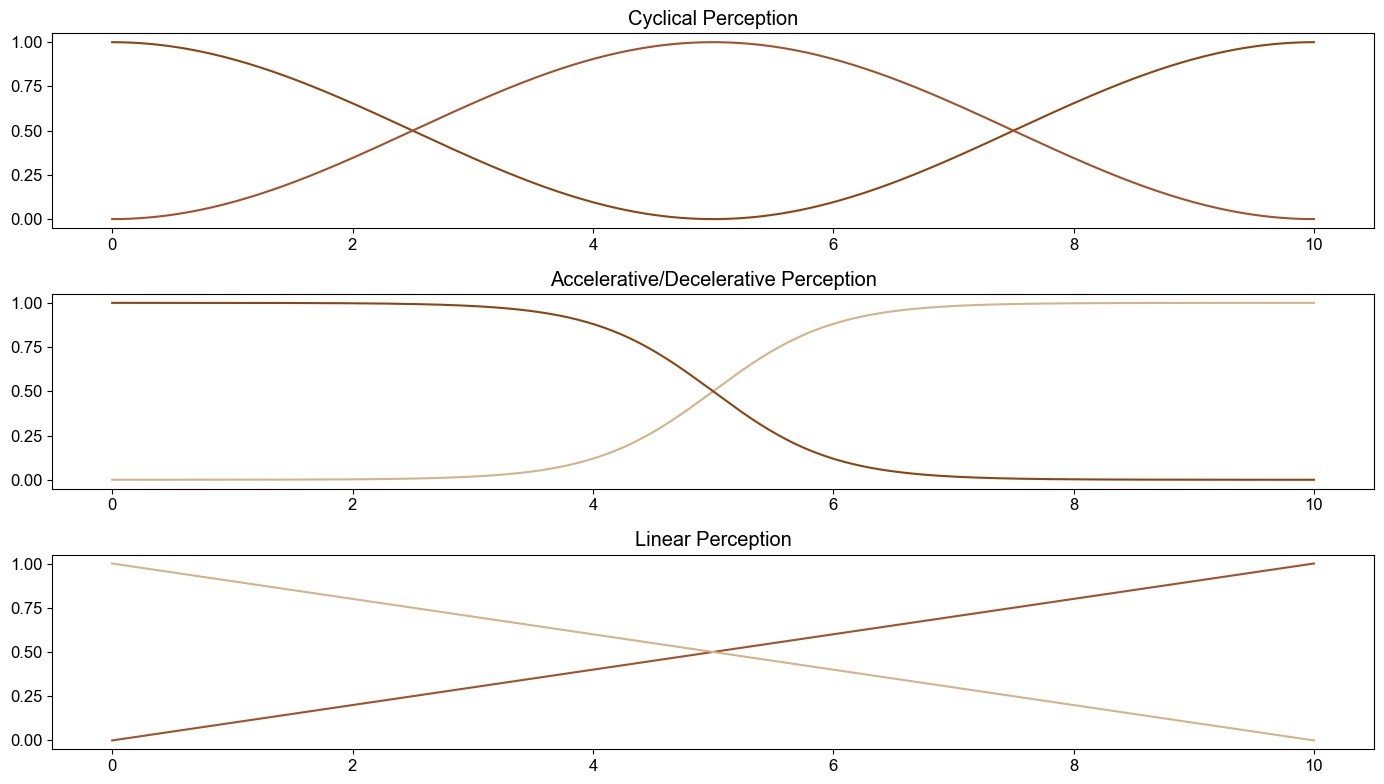

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Time array
t = np.linspace(0, 10, 400)

# Cyclical perception (sinusoidal weights)
T = 10
w1_cyclical = 0.5 * (1 + np.cos(2 * np.pi * t / T))
w2_cyclical = 1 - w1_cyclical

# Accelerative/Decelerative perception (logistic function weights)
alpha = 2
t0 = 5
w1_accel = 1 / (1 + np.exp(-alpha * (t - t0)))
w2_accel = 1 - w1_accel

# Linear perception (linear weights)
w1_linear = t / T
w2_linear = 1 - w1_linear

# Define colors
colors = ['#8B4513', '#A0522D', '#D2B48C', '#8B4513', '#A0522D', '#D2B48C']

# Plotting the results
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, w1_cyclical, label='w1 - Cyclical', color=colors[0])
plt.plot(t, w2_cyclical, label='w2 - Cyclical', color=colors[1])
plt.title('Cyclical Perception')


plt.subplot(3, 1, 2)
plt.plot(t, w1_accel, label='w1 - Accelerative/Decelerative', color=colors[2])
plt.plot(t, w2_accel, label='w2 - Accelerative/Decelerative', color=colors[3])
plt.title('Accelerative/Decelerative Perception')


plt.subplot(3, 1, 3)
plt.plot(t, w1_linear, label='w1 - Linear', color=colors[4])
plt.plot(t, w2_linear, label='w2 - Linear', color=colors[5])
plt.title('Linear Perception')


plt.tight_layout()
plt.show()